In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import csv

from fontTools.subset import subset

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [ ]:
conn = sqlite3.connect("../db.sqlite3")
cursor = conn.cursor()
cursor.execute("SELECT a.*, b.datetime, c.price, c.name FROM restaurant_orderitem AS a LEFT JOIN restaurant_order AS b ON a.order_id = b.id LEFT JOIN restaurant_product AS c ON a.product_id = c.id")
tables = cursor.fetchall()
csv_file = "../restaurant_data.csv"
with open(csv_file, "w", newline="") as f:
    writer = csv.writer(f)

    column_names = [description[0] for description in cursor.description]
    writer.writerow(column_names)

    writer.writerows(tables)

cursor.close()
conn.close()

In [ ]:
order_data = pd.read_csv("../restaurant_data.csv")
order_data.index = order_data["id"]
order_data = order_data.drop(columns=["id", "order_id", "product_id"])
order_data.describe()

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [ ]:
order_data.groupby("name")["quantity"].sum().sort_values(ascending=False).head(10).plot.pie(y="Quantity", autopct="%1.1f%%", title="Top 10 most popular products sold by Quantity", figsize=(8, 8), startangle=90, pctdistance=0.8)

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

In [ ]:
order_data["Item Price"] = order_data["price"] * order_data["quantity"]
order_data.groupby("name")["Item Price"].sum().sort_values(ascending=False).head(10).plot.pie(autopct="%1.1f%%", title="Top 10 most popular products sold by Item Price", figsize=(8, 8), startangle=90, pctdistance=0.8, y="Item Price")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

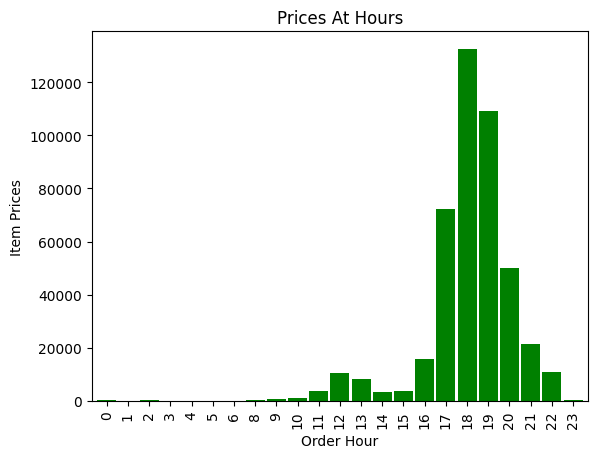

In [50]:
order_data["datetime"] = pd.to_datetime(order_data["datetime"])
order_data["Order Hour"] = order_data["datetime"].dt.hour
order_data["Item Price"].groupby(order_data["Order Hour"]).sum().plot.bar(xlabel="Order Hour", ylabel="Item Prices", title="Prices At Hours", color="green", width=0.9)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

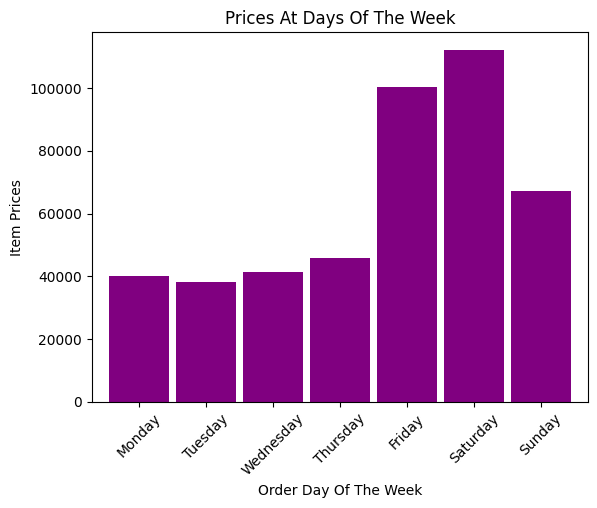

In [49]:
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
order_data["Order Day Of The Week"] = order_data["datetime"].dt.dayofweek
order_data["Order Day Of The Week"] = order_data["Order Day Of The Week"].apply(lambda x: days_of_week[x])

order_data["Order Day Of The Week"] = pd.Categorical(order_data["Order Day Of The Week"], categories=days_of_week)

order_data.groupby("Order Day Of The Week", observed=False)["Item Price"].sum().plot.bar(xlabel="Order Day Of The Week", ylabel="Item Prices", title="Prices At Days Of The Week", color="purple", width=0.9)
plt.xticks(rotation=45)
plt.show()